<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [2]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.0. Write code to display the count of null values in each column<h3>

In [3]:
# Command:

print(credit_train.isnull().sum())
credit_test.isnull().sum()
# One sentance summary:
#There doesn't appear to be any column with null values.

Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64


Class                             0
Duration                          0
Amount                            0
InstallmentRatePercentage         0
ResidenceDuration                 0
Age                               0
NumberExistingCredits             0
NumberPeopleMaintenance           0
Telephone                         0
ForeignWorker                     0
CheckingAccountStatus.lt.0        0
CheckingAccountStatus.0.to.200    0
CheckingAccountStatus.gt.200      0
CreditHistory.ThisBank.AllPaid    0
CreditHistory.PaidDuly            0
CreditHistory.Delay               0
CreditHistory.Critical            0
dtype: int64

<h3>Q.1. How does the distribution of credit amount look like? (Use a histogram plot to answer this question)</h3>

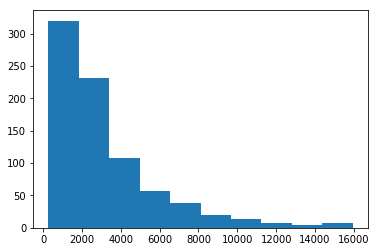

In [11]:
# Put the command (or commands) here that would give an answer to the above question.
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

#TODO
X = credit_train['Amount'].tolist()

plt.hist(X)
plt.show()

<h3>Q.2. Can you generate a plot that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NameError: name 'stats' is not defined

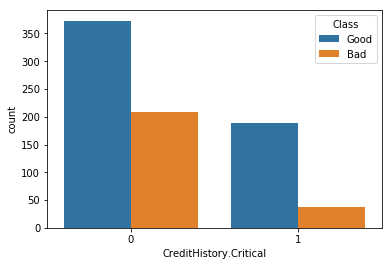

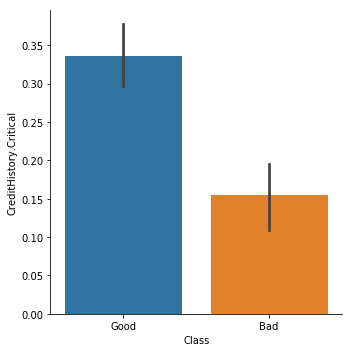

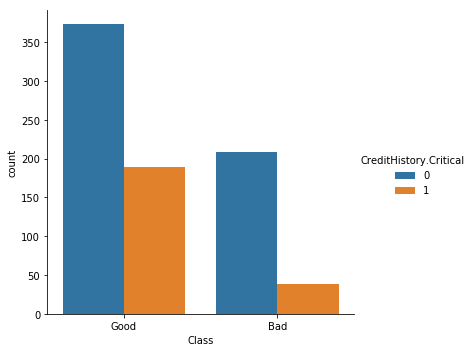

In [9]:
# Command:

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# Put the command (or commands) here that would give answer to the above question.

credit_train['CreditWorthiness'] = (credit_train['Class'] == 'Good').astype(int)
credit_train.head()

sn.countplot(x='CreditHistory.Critical', hue='Class', data=credit_train)

sn.catplot(x='Class', y='CreditHistory.Critical', kind='bar', data=credit_train)

sn.catplot(x='Class', hue='CreditHistory.Critical', kind='count', data=credit_train)

#--------------------------------------
slope, intercept, r_value, p_value, std_err = stats.linregress(credit_train['CreditHistory.Critical'], credit_train['CreditClass'])
print(slope, intercept,r_value, p_value, std_err)

def predict(x):
    return slope * x + intercept #equation of a line f(x)

fitLine = predict(credit_train['CreditHistory.Critical'])

plt.scatter(credit_train['CreditHistory.Critical'],  credit_train['CreditClass'])
plt.plot(credit_train['CreditHistory.Critical'], fitLine, c='r')
plt.show()

print(predict(.1))
print(predict(.3))
print(predict(.5))
plt.show()

# One sentence summary:
# Yes, I do notice that person with critical credit history is more credit worthy.

<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [7]:
credit_train['CreditClass'] = (credit_train['Class'] == 'Good').astype(int)

<h3>Q.4. Generate a logistic regression model that uses the one predictor CreditHistory.Critical. Provide a summary of the model. </h3>

Optimization terminated successfully.
         Current function value: 0.595927
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            CreditClass   No. Observations:                  808
Model:                          Logit   Df Residuals:                      806
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Apr 2020   Pseudo R-squ.:                 0.03037
Time:                        19:05:38   Log-Likelihood:                -481.51
converged:                       True   LL-Null:                       -496.59
                                        LLR p-value:                 3.971e-08
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.5840      0.087      6.749      0.000       0.414      

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


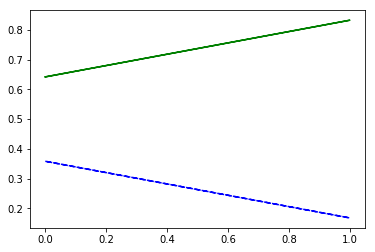

In [31]:
import statsmodels.api as sm
import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

stats.chisqprob = lambda chisq, credit_train: stats.chi2.sf(chisq, credit_train)

X1 = credit_train['CreditHistory.Critical'] # our training data
y = credit_train['CreditClass']

X_const = sm.add_constant(X1)

model = sm.Logit(y, X_const)

results = model.fit()
print(results.summary())

#-----------------------------------------
logreg = LogisticRegression(fit_intercept = True, C = 1e9)

# fit the model with data
X_train = credit_train['CreditHistory.Critical'].values.reshape(-1,1)
y_train = (credit_train["Class"] == 'Good').astype(np.int)
logreg.fit(X_train,y_train)

X_new = credit_test['CreditHistory.Critical'].values.reshape(-1,1)
y_proba = logreg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Good")
plt.plot(X_new, y_proba[:, 0], "b--", label="Bad")
print("Coef: ", logreg.coef_)
print("Intercept: ",logreg.intercept_)


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [27]:
from sklearn import metrics
X_test = credit_test['CreditHistory.Critical'].values.reshape(-1,1)
y_test = (credit_test["Class"] == 'Good').astype(np.int)
y_pred=logreg.predict(X_test)
y_pred

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0,  54],
       [  0, 138]])

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [29]:
# Command that outputs acccuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))


Accuracy: 0.71875


<h3>Q.7. Generate the ROC curve.</h3>

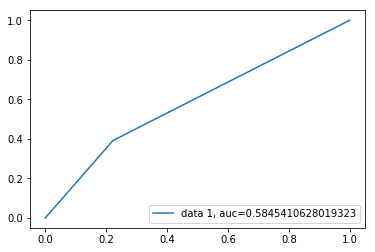

In [22]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [23]:
# Command(s):
auc


0.5845410628019323

<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)

#Prior probabilities of groups
print("priors:", lda.priors_)

#Group means
print("means:", lda.means_)

print("coef:", lda.coef_)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))


priors: [0.30445545 0.69554455]
means: [[0.15447154]
 [0.33629893]]
coef: [[0.93008353]]
[[  0   0]
 [ 54 138]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        54
           1      0.719     1.000     0.836       138

    accuracy                          0.719       192
   macro avg      0.359     0.500     0.418       192
weighted avg      0.517     0.719     0.601       192



/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h3>Q.10. What is the accuracy of the new model?</h3>

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(y_test, pred)))

Accuracy: 0.71875


<h3>Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

Overall it was an interesting assignment for Classification. With examples, that were shown in class, the assignment was straight-forward.
Our team is building a classification service in Azure, which is segmenting the customer subscriptions into various customer segments.
For example: Premium, Priority, Standard and others. This is to offer differentiated customer experience.
And we are looking to use some sort of classification model for it.

I would love to play with multi-class classification problem. I feel that it will be a good step after this assignment.